In [68]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd

fromage = pd.read_table(r"fromage.txt", sep="\t", header=0, index_col=0)
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [69]:
fromage.dtypes

calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object

<AxesSubplot:>

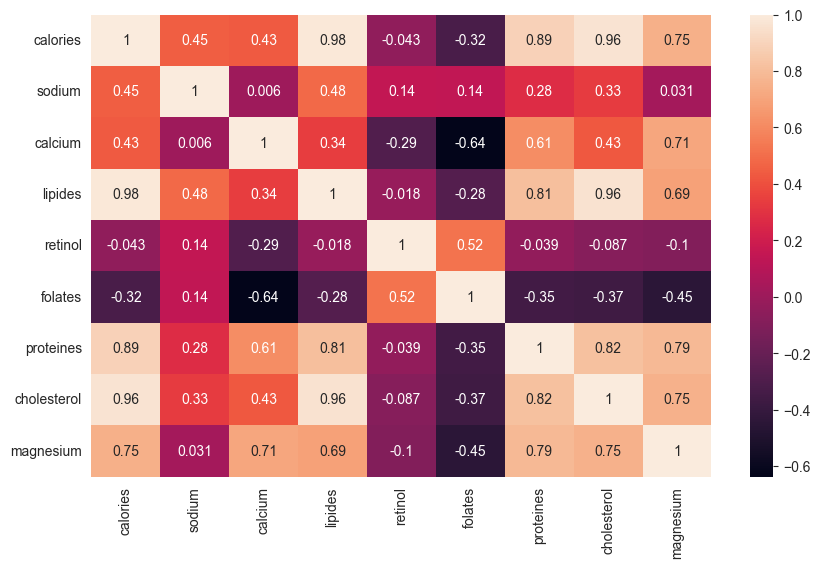

In [70]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(fromage.corr(), annot=True)

##### Comment sont réparties les données :
29 different instances , 9 continuous features
#####  Quels sont les attributs de ce jeu de données :
'calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates', 'proteines', 'cholesterol', 'magnesium'


array([[<AxesSubplot:xlabel='calories', ylabel='calories'>,
        <AxesSubplot:xlabel='sodium', ylabel='calories'>,
        <AxesSubplot:xlabel='calcium', ylabel='calories'>,
        <AxesSubplot:xlabel='lipides', ylabel='calories'>,
        <AxesSubplot:xlabel='retinol', ylabel='calories'>,
        <AxesSubplot:xlabel='folates', ylabel='calories'>,
        <AxesSubplot:xlabel='proteines', ylabel='calories'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='calories'>,
        <AxesSubplot:xlabel='magnesium', ylabel='calories'>],
       [<AxesSubplot:xlabel='calories', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='calcium', ylabel='sodium'>,
        <AxesSubplot:xlabel='lipides', ylabel='sodium'>,
        <AxesSubplot:xlabel='retinol', ylabel='sodium'>,
        <AxesSubplot:xlabel='folates', ylabel='sodium'>,
        <AxesSubplot:xlabel='proteines', ylabel='sodium'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='sodium'>

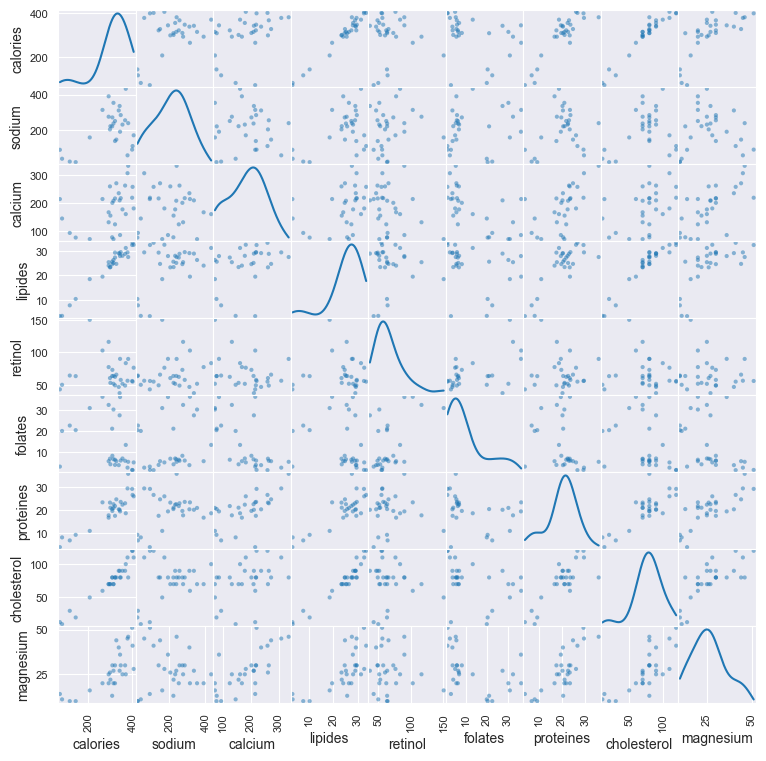

In [71]:
pd.plotting.scatter_matrix(fromage, figsize=(9, 9), diagonal='kde')

###### pandas_profiling.profilereport() | ydata_profiling.profilereport()

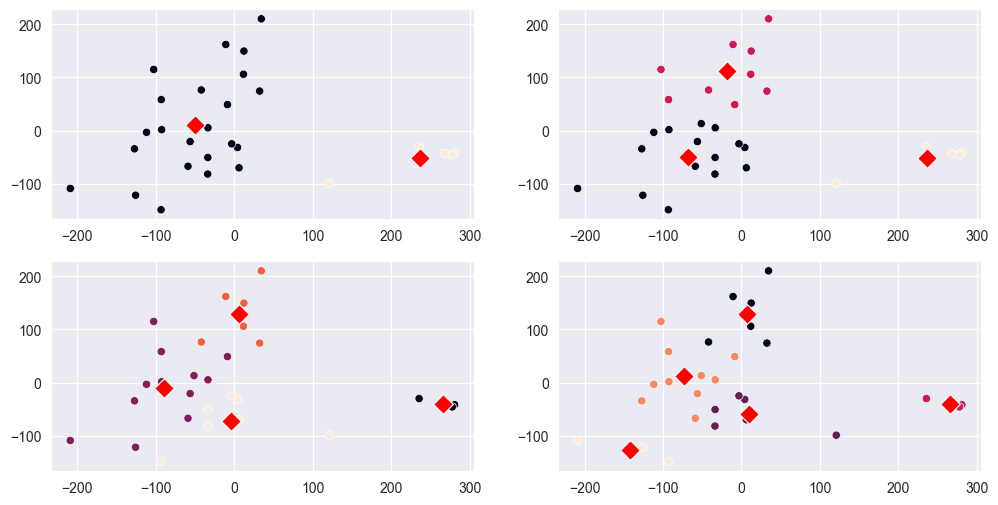

In [81]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

plt.figure(figsize=(12,6))
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fromage)
    plt.subplot(2, 2, k - 1)
    dim_red = PCA(n_components=2)
    reducted_fromage = dim_red.fit_transform(fromage)
    centers = dim_red.transform(kmeans.cluster_centers_)
    sns.scatterplot(x=reducted_fromage[:, 0], y=reducted_fromage[:, 1], c=kmeans.labels_)
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='r', marker='D', s=100)

In [82]:
np.random.seed(0)
# By default , 8 n_clusters = 8
kmeans = KMeans(n_clusters=4)
kmeans.fit(fromage)
# Returns the indices that would sort an array
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk], kmeans.labels_[idk]))
# Transform X to a cluster-distance space. In the new space, each dimension is the distance to the cluster centers.
print(kmeans.transform(fromage))

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

<AxesSubplot:>

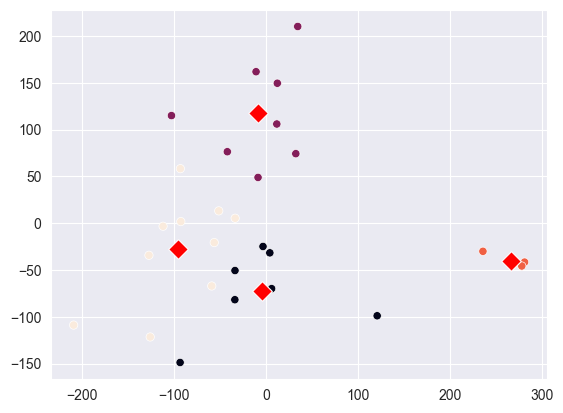

In [83]:
dim_red = PCA(n_components=2)
reducted_fromage = dim_red.fit_transform(fromage)
centers = dim_red.transform(kmeans.cluster_centers_)
sns.scatterplot(x=reducted_fromage[:, 0], y=reducted_fromage[:, 1], c=kmeans.labels_)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='r', marker='D', s=100)

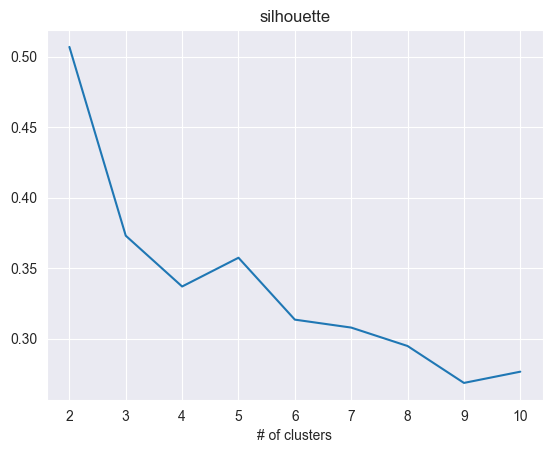

In [75]:
from sklearn import metrics

res = np.arange(9, dtype="double")
for k in np.arange(9):
    km = KMeans(n_clusters=k + 2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage, km.labels_)
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2, 11, 1), res)
plt.show()

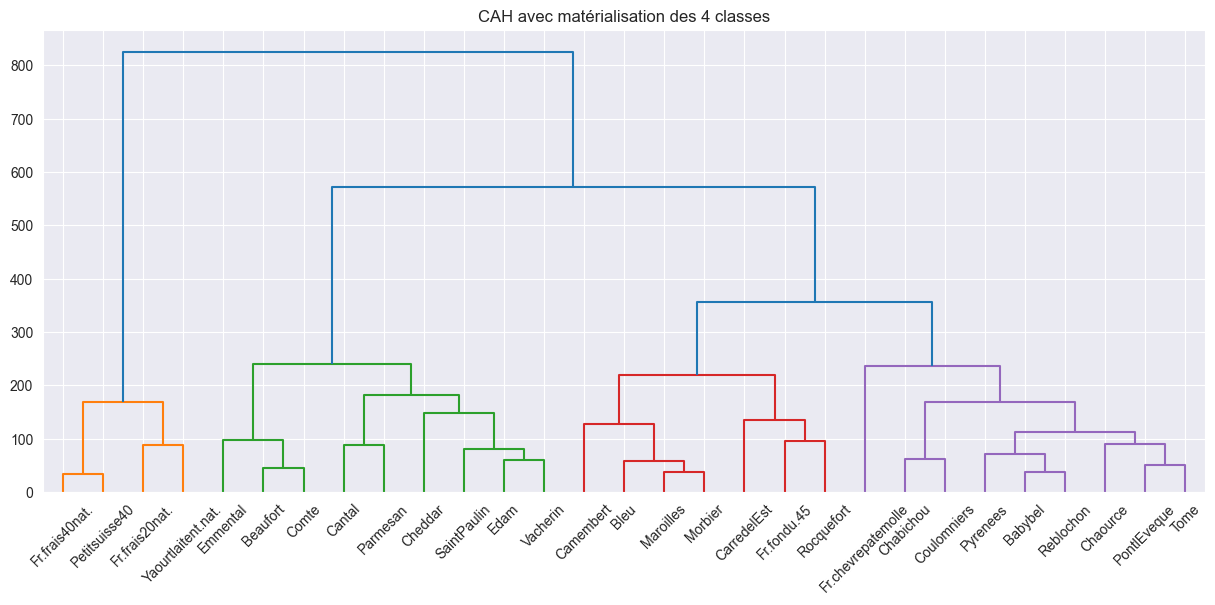

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [84]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(fromage, method='ward', metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(15, 6))
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels=fromage.index, orientation='top', color_threshold=250)
plt.show()
groupes_cah = fcluster(Z, t=250, criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idg], groupes_cah[idg]))

In [85]:
pd.crosstab(kmeans.labels_, groupes_cah - 1)

col_0,0,1,2,3
row_0,,,,
0,0,0,1,6
1,0,8,0,0
2,4,0,0,0
3,0,1,6,3


##### AgglomerativeClustering and Scipy fcluster returns the same clustering

In [79]:
from sklearn.cluster import AgglomerativeClustering
cah = AgglomerativeClustering(n_clusters=4,linkage='complete')
fromage_cah = cah.fit_predict(fromage)
pd.crosstab(fromage_cah,groupes_cah - 1)

col_0,0,1,2,3
row_0,,,,
0,0,0,7,6
1,4,0,0,0
2,0,9,0,0
3,0,0,0,3


##### DIANA : divisive_hierarchical_clustering using kmeans

In [111]:
def divisive_hierarchical_clustering_kmeans(data, n_clusters):

    labels = np.zeros(len(data)).astype(int)
    current_num_clusters = 1
    next_value = 1

    while current_num_clusters < n_clusters:
        # Find the cluster with the most points to split
        max_cluster = np.argmax(np.bincount(labels))
        mask = labels == max_cluster
        sub_data = data[mask]

        # If n_clusters > data.shape[0]
        if sub_data.shape[0] == 1:
            break

        # Perform k-means clustering with k=2 on the selected cluster
        kmeans = KMeans(n_clusters=2).fit(sub_data)
        sub_labels = kmeans.labels_

        # Update labels for the new clusters
        labels[mask] = np.where(sub_labels == 0, max_cluster, next_value)


        next_value += 1
        current_num_clusters += 1

    return labels

diana = divisive_hierarchical_clustering_kmeans(fromage, fromage.shape[0])
diana

array([15, 16,  7, 18,  9, 20, 11,  3,  2, 22, 25, 27, 17,  0, 21,  8, 12,
        1, 10,  4, 26,  6, 28, 24,  5, 14, 19, 13, 23])

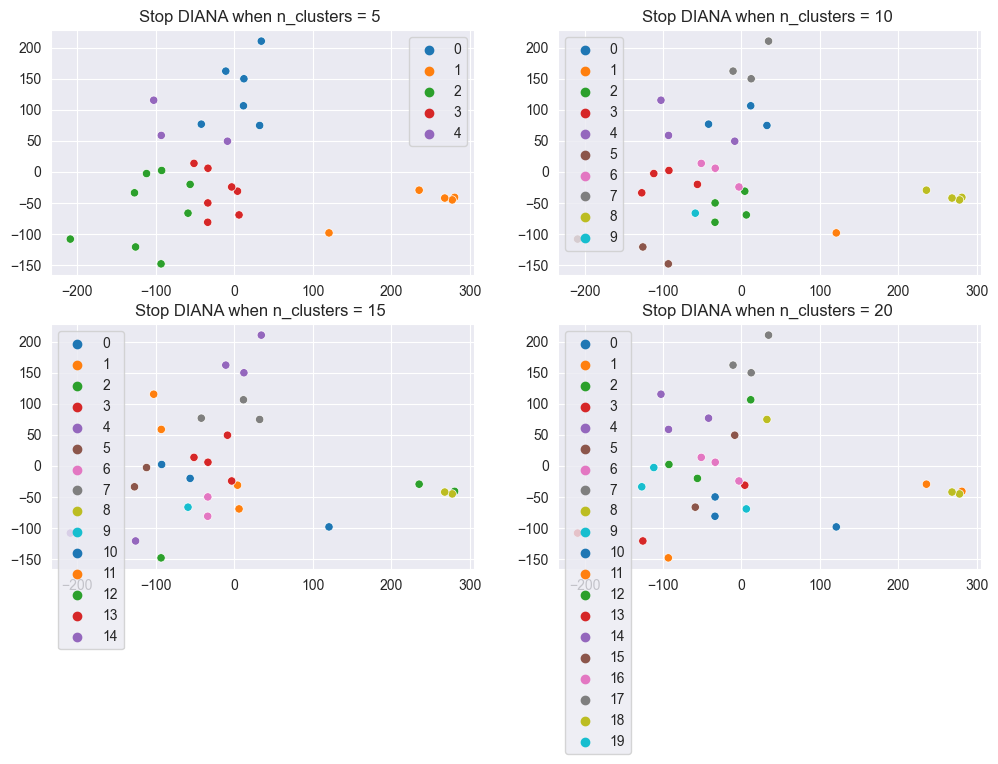

In [126]:
plt.figure(figsize=(12,7))
for k in range(2, 6):
    diana = divisive_hierarchical_clustering_kmeans(fromage, 5*(k-1))
    plt.subplot(2, 2, k - 1)
    dim_red = PCA(n_components=2)
    reducted_fromage = dim_red.fit_transform(fromage)
    sns.scatterplot(x=reducted_fromage[:, 0], y=reducted_fromage[:, 1], hue=diana,palette='tab10')
    plt.title(f"Stop DIANA when n_clusters = {(5*(k-1))} ")

##### We could have used Normalizer for preprocessing
normalize each row so that it has a unit norm => each sample's values are adjusted relative to the values in that specific sample.

In [127]:
from sklearn.preprocessing import Normalizer
euclidean_norm = Normalizer(norm='l2')
fromage = pd.DataFrame(euclidean_norm.fit_transform(fromage),columns=fromage.columns,index=fromage.index)
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,0.642501,0.723325,0.148553,0.053815,0.105583,0.061999,0.042970,0.143233,0.040924
Babybel,0.685001,0.519205,0.457686,0.054756,0.138964,0.013962,0.049303,0.152707,0.058901
Beaufort,0.784098,0.219000,0.507219,0.065113,0.107349,0.002346,0.052012,0.234643,0.080170
Bleu,0.638803,0.627596,0.394302,0.053981,0.069297,0.051366,0.037730,0.168106,0.050432
Camembert,0.548376,0.652235,0.448464,0.040505,0.213950,0.075609,0.048606,0.124631,0.041544
Cantal,0.690253,0.481484,0.496531,0.054167,0.091783,0.010721,0.043258,0.169272,0.056424
Chabichou,0.808363,0.451179,0.204911,0.065562,0.211725,0.085301,0.045823,0.187991,0.084596
Chaource,0.652614,0.616855,0.297029,0.056769,0.260152,0.072637,0.039783,0.156449,0.055875
Cheddar,0.815053,0.345293,0.365971,0.065244,0.153375,0.009837,0.052196,0.220827,0.056211
